In [2]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd # Data manipulation library
import numpy as np # Statisical Computation library
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns # Data visualization library

In [61]:
#Reading the excel workbook and saving it in a variable
netflix_df = pd.read_excel("Netflix_shows_movies.xlsx")

### Investigating the dataset briefly

In [64]:
#Getting a summary of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [66]:
netflix_df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [71]:
netflix_df.tail()

show_id     type                                        title director  \
6229  80000063  TV Show                                 Red vs. Blue      NaN   
6230  70286564  TV Show                                        Maron      NaN   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends      NaN   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
6233  70153404  TV Show                                      Friends      NaN   

                                                   cast         country  \
6229  Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...   United States   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
6231                                                NaN             NaN   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   

     date_added  release_year rating    duration  \
6229        NaN          2015     NR  13 Seasons   
6230        NaN          2016  TV-MA   4 Seasons   
6231        NaN          2016    NaN      60 min   
6232        NaN          2013  TV-MA   2 Seasons   
6233        NaN          2003  TV-14  10 Seasons   

                                              listed_in  \
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           British TV Shows, TV Comedies, TV Dramas   
6233                     Classic & Cult TV, TV Comedies   

                                            description  
6229  This parody of first-person shooter games, mil...  
6230  Marc Maron stars as Marc Maron, who interviews...  
6231  Nursery rhymes and original music for children...  
6232  Set during the Russian Revolution, this comic ...  
6233  This hit sitcom follows the merry misadventure...

In [68]:
#Checking for duplicate rows
netflix_df.duplicated().sum()

0

No duplicate rows in the dataset

In [73]:
#Checking all columns and the number of missing values in each
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [75]:
netflix_df.isnull().sum()[netflix_df.isnull().sum() > 0]

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64

In [77]:
#Get percentage of missing values for columns with missing values
netflix_df.isnull().sum()[netflix_df.isnull().sum() > 0] / len(netflix_df) * 100

director      31.584857
cast           9.143407
country        7.635547
date_added     0.176452
rating         0.160411
dtype: float64

### Data Cleaning

**The missing values for these columns will be handled as follows:**

- director: The missing values will be replaced with the word "missing".
- cast: The missing values will be replaced with the word "missing".
- country: The missing values will be replaced with the word "missing".
- rating: The missing values will be filled with the word "missing".
- date_added: The rows where there are missing values will be deleted since the date column can't be filled based on assumptions.

In [80]:
#Creating a list for columns that are categorical
missing_cat_cols = ['director', 'cast', 'country', 'rating']

#Filling the missing values using a for loop
for column in missing_cat_cols:
    netflix_df[column].fillna("missing", inplace=True)

In [ ]:
netflix_df.isnull().sum()[netflix_df.isnull().sum() > 0]

In [96]:
#Dropping rows with missing values since the date_added column is the only one with missing values left
netflix_df.dropna(axis=0, inplace=True)

In [98]:
#Checking to see if there are still missing values in the dataset
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The data is clean and free from missing values

#### Data Transformation

In [114]:
netflix_df['date_added'].dtype

dtype('O')

In [116]:
#The date_added column has an object datatype which should be changed to date/datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(' ')) #The strip method gets rid of extra spaces

In [118]:
netflix_df['date_added'].dtype

dtype('<M8[ns]')

In [120]:
netflix_df.to_excel("cleaned_netflix.xlsx", index=False)

### Data Exploration and Analysis

##### Frequency of show types

In [130]:
netflix_df['type'].value_counts()

type
Movie      4264
TV Show    1959
Name: count, dtype: int64

**From the above, it can be seen that the most common show types produced is _Movies_**

##### What year has the most release of shows?

In [140]:
netflix_df['release_year'].value_counts().nlargest(1)

release_year
2018    1062
Name: count, dtype: int64

**In the year 2018, 1,062 shows were released. This is year with the most shows in the dataset**

##### What's the most common rating of shows?

In [154]:
netflix_df['rating'].value_counts().nlargest(1)

rating
TV-MA    2025
Name: count, dtype: int64

**Most shows are rated 'TV-MA'**

##### What's the least common rating of shows?

In [156]:
netflix_df['rating'].value_counts().nsmallest(1)

rating
NC-17    2
Name: count, dtype: int64

**The most uncommon rating is 'NC-17'**

##### What country has the highest release of shows?

In [167]:
netflix_df['country'].value_counts().nlargest(1)

country
United States    2026
Name: count, dtype: int64

**The United states released a total of 2,026 movies**

##### How many years does the record span across?

In [173]:
netflix_df['release_year'].max() - netflix_df['release_year'].min()

95

**The records in the dataset spans across 95 years**

##### How many years' data was recorded?

In [181]:
netflix_df['release_year'].nunique()

72

**Though the records in the dataset spans across 95 years, only movies released in 72 years were recorded**

### Data Visualization

In [195]:
rating = netflix_df['rating'].value_counts().nlargest(5)

In [199]:
rating

rating
TV-MA    2025
TV-14    1695
TV-PG     699
R         508
PG-13     286
Name: count, dtype: int64

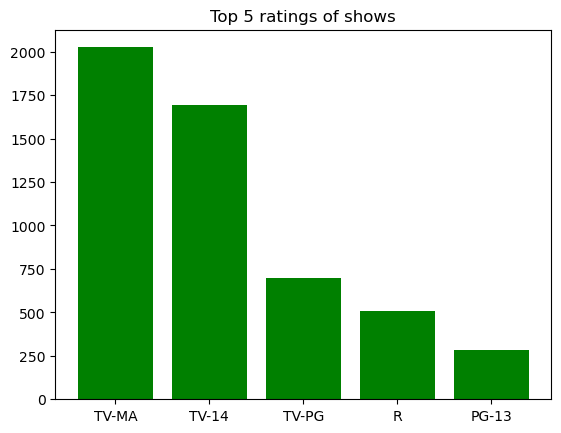

In [201]:
#Distribution of the top 5 ratings for shows
plt.bar(rating.index, rating.values, color='green')
plt.title("Top 5 ratings of shows")
plt.show()

In [235]:
countries = netflix_df['country'].value_counts().nlargest(2)

In [237]:
countries

country
United States    2026
India             777
Name: count, dtype: int64

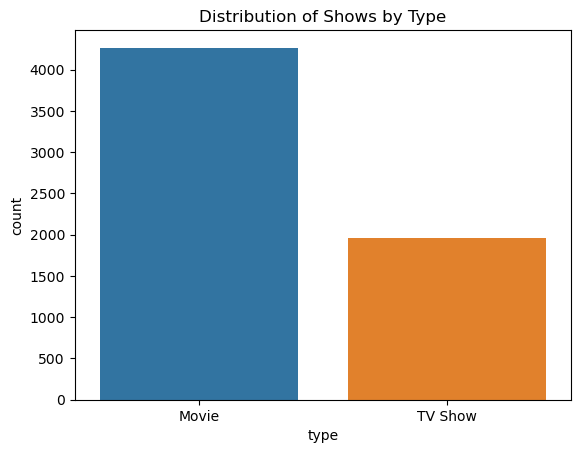

In [233]:
sns.countplot(data=netflix_df, x='type').set_title('Distribution of Shows by Type');

In [241]:
#Export the cleaned version of the data to use in R studio
netflix_df.to_excel("cleaned_netflix.xlsx", index=False)